##Let's Build the Full Mean Girls Network

In [1]:
import networkx as nx
import csv
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)

First, import our data. Two csvs, one containing a list of characters and the other containing two columns, one containing the speaker and the other containing the listener

In [2]:
node_list = []

with open('../data/nodes.csv', 'r') as openfile:
    reader = csv.reader(openfile)
    next(reader, None)
    for row in reader:
        node_list.append((row[0], {'name' : row[1]}))
        
print len(node_list), '\n', node_list[:10]

82 
[('0', {'name': "Cady's Dad"}), ('1', {'name': "Cady's Mom"}), ('2', {'name': 'Cady Heron'}), ('3', {'name': 'Homeschooled Boy 1'}), ('4', {'name': 'Homeschooled Boy 2'}), ('5', {'name': 'Homeschooled Boy 3'}), ('6', {'name': 'Kristen Hadley'}), ('7', {'name': 'Janis Ian'}), ('8', {'name': "Kristen's Boyfriend"}), ('9', {'name': 'Ms. Norbury'})]


In [3]:
edge_list = []

with open('../data/edges.csv', 'r') as openfile:
    reader = csv.reader(openfile)
    next(reader, None)
    for row in reader:
        if row[1] == '':
            pass
        else:
            edge_list.append((row[0], row[1]))
        
print len(edge_list), '\n', edge_list[:10]

922 
[('0', '2'), ('1', '2'), ('1', '2'), ('2', '0'), ('2', '1'), ('0', '1'), ('0', '2'), ('2', '0'), ('2', '1'), ('2', '6')]


Let's build the network. We'll start with an undirected graph in NetworkX

In [4]:
mean_girls = nx.Graph()
mean_girls.add_nodes_from(node_list)
mean_girls.add_edges_from(edge_list)

In [5]:
print nx.info(mean_girls)

Name: 
Type: Graph
Number of nodes: 82
Number of edges: 96
Average degree:   2.3415


First, let's take a look at what the network looks like at large

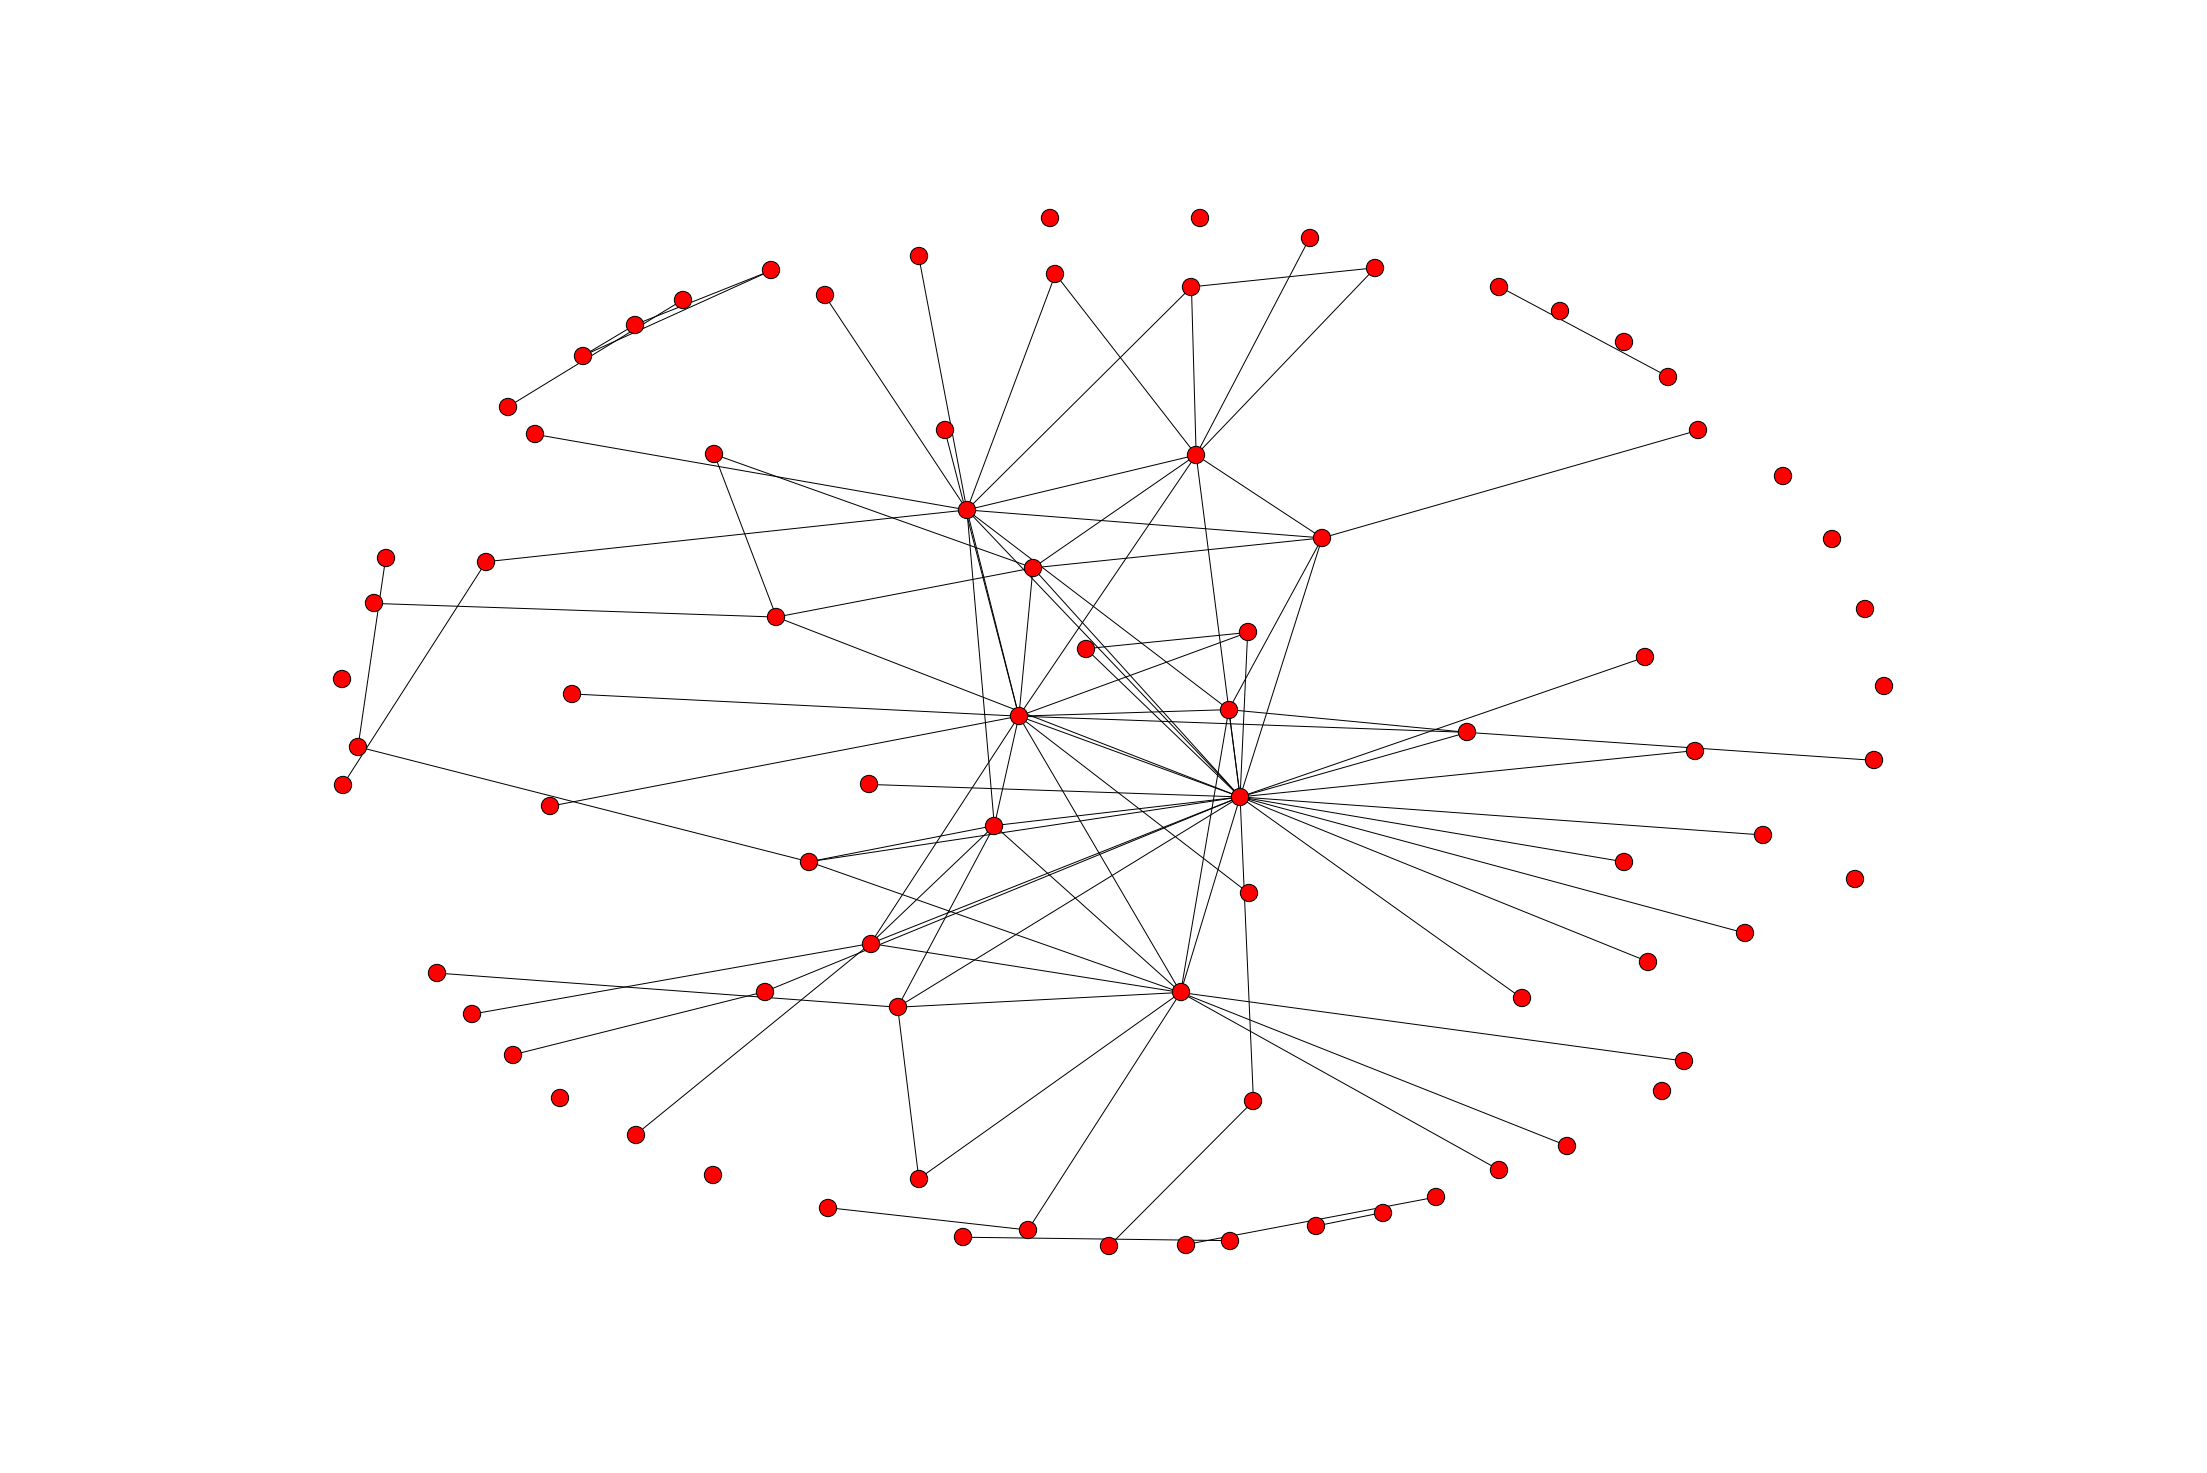

In [6]:
nx.draw(mean_girls)

It's pretty ugly, but we'll make it look better in later steps. It doesn't appear to be a fully connected network, but we can check that

In [7]:
nx.is_connected(mean_girls)

False

In [8]:
nx.number_connected_components(mean_girls)

20

In [9]:
nx.isolates(mean_girls)

['43', '24', '25', '26', '27', '3', '5', '4', '51', '70', '15', '14', '16']

So, who are the isolates in this network?

In [10]:
for node in mean_girls.nodes_iter(data=True):
    if node[0] in nx.isolates(mean_girls):
        print node

('43', {'name': 'Jock'})
('24', {'name': 'Emma Gerber'})
('25', {'name': 'Girl'})
('26', {'name': 'Mathlete Tim Pak'})
('27', {'name': "Amber D'Alessio"})
('3', {'name': 'Homeschooled Boy 1'})
('5', {'name': 'Homeschooled Boy 3'})
('4', {'name': 'Homeschooled Boy 2'})
('51', {'name': 'Girl 1'})
('70', {'name': 'Girl 8'})
('15', {'name': 'Music Teacher'})
('14', {'name': 'History Teacher'})
('16', {'name': 'German Teacher'})


We could remove these from the graph if we wanted to:

In [11]:
mean_girls_no_isolates = nx.Graph(mean_girls)
mean_girls_no_isolates.remove_nodes_from(nx.isolates(mean_girls_no_isolates))
print nx.info(mean_girls_no_isolates), '\n', '\n', nx.info(mean_girls)

Name: 
Type: Graph
Number of nodes: 69
Number of edges: 96
Average degree:   2.7826 

Name: 
Type: Graph
Number of nodes: 82
Number of edges: 96
Average degree:   2.3415


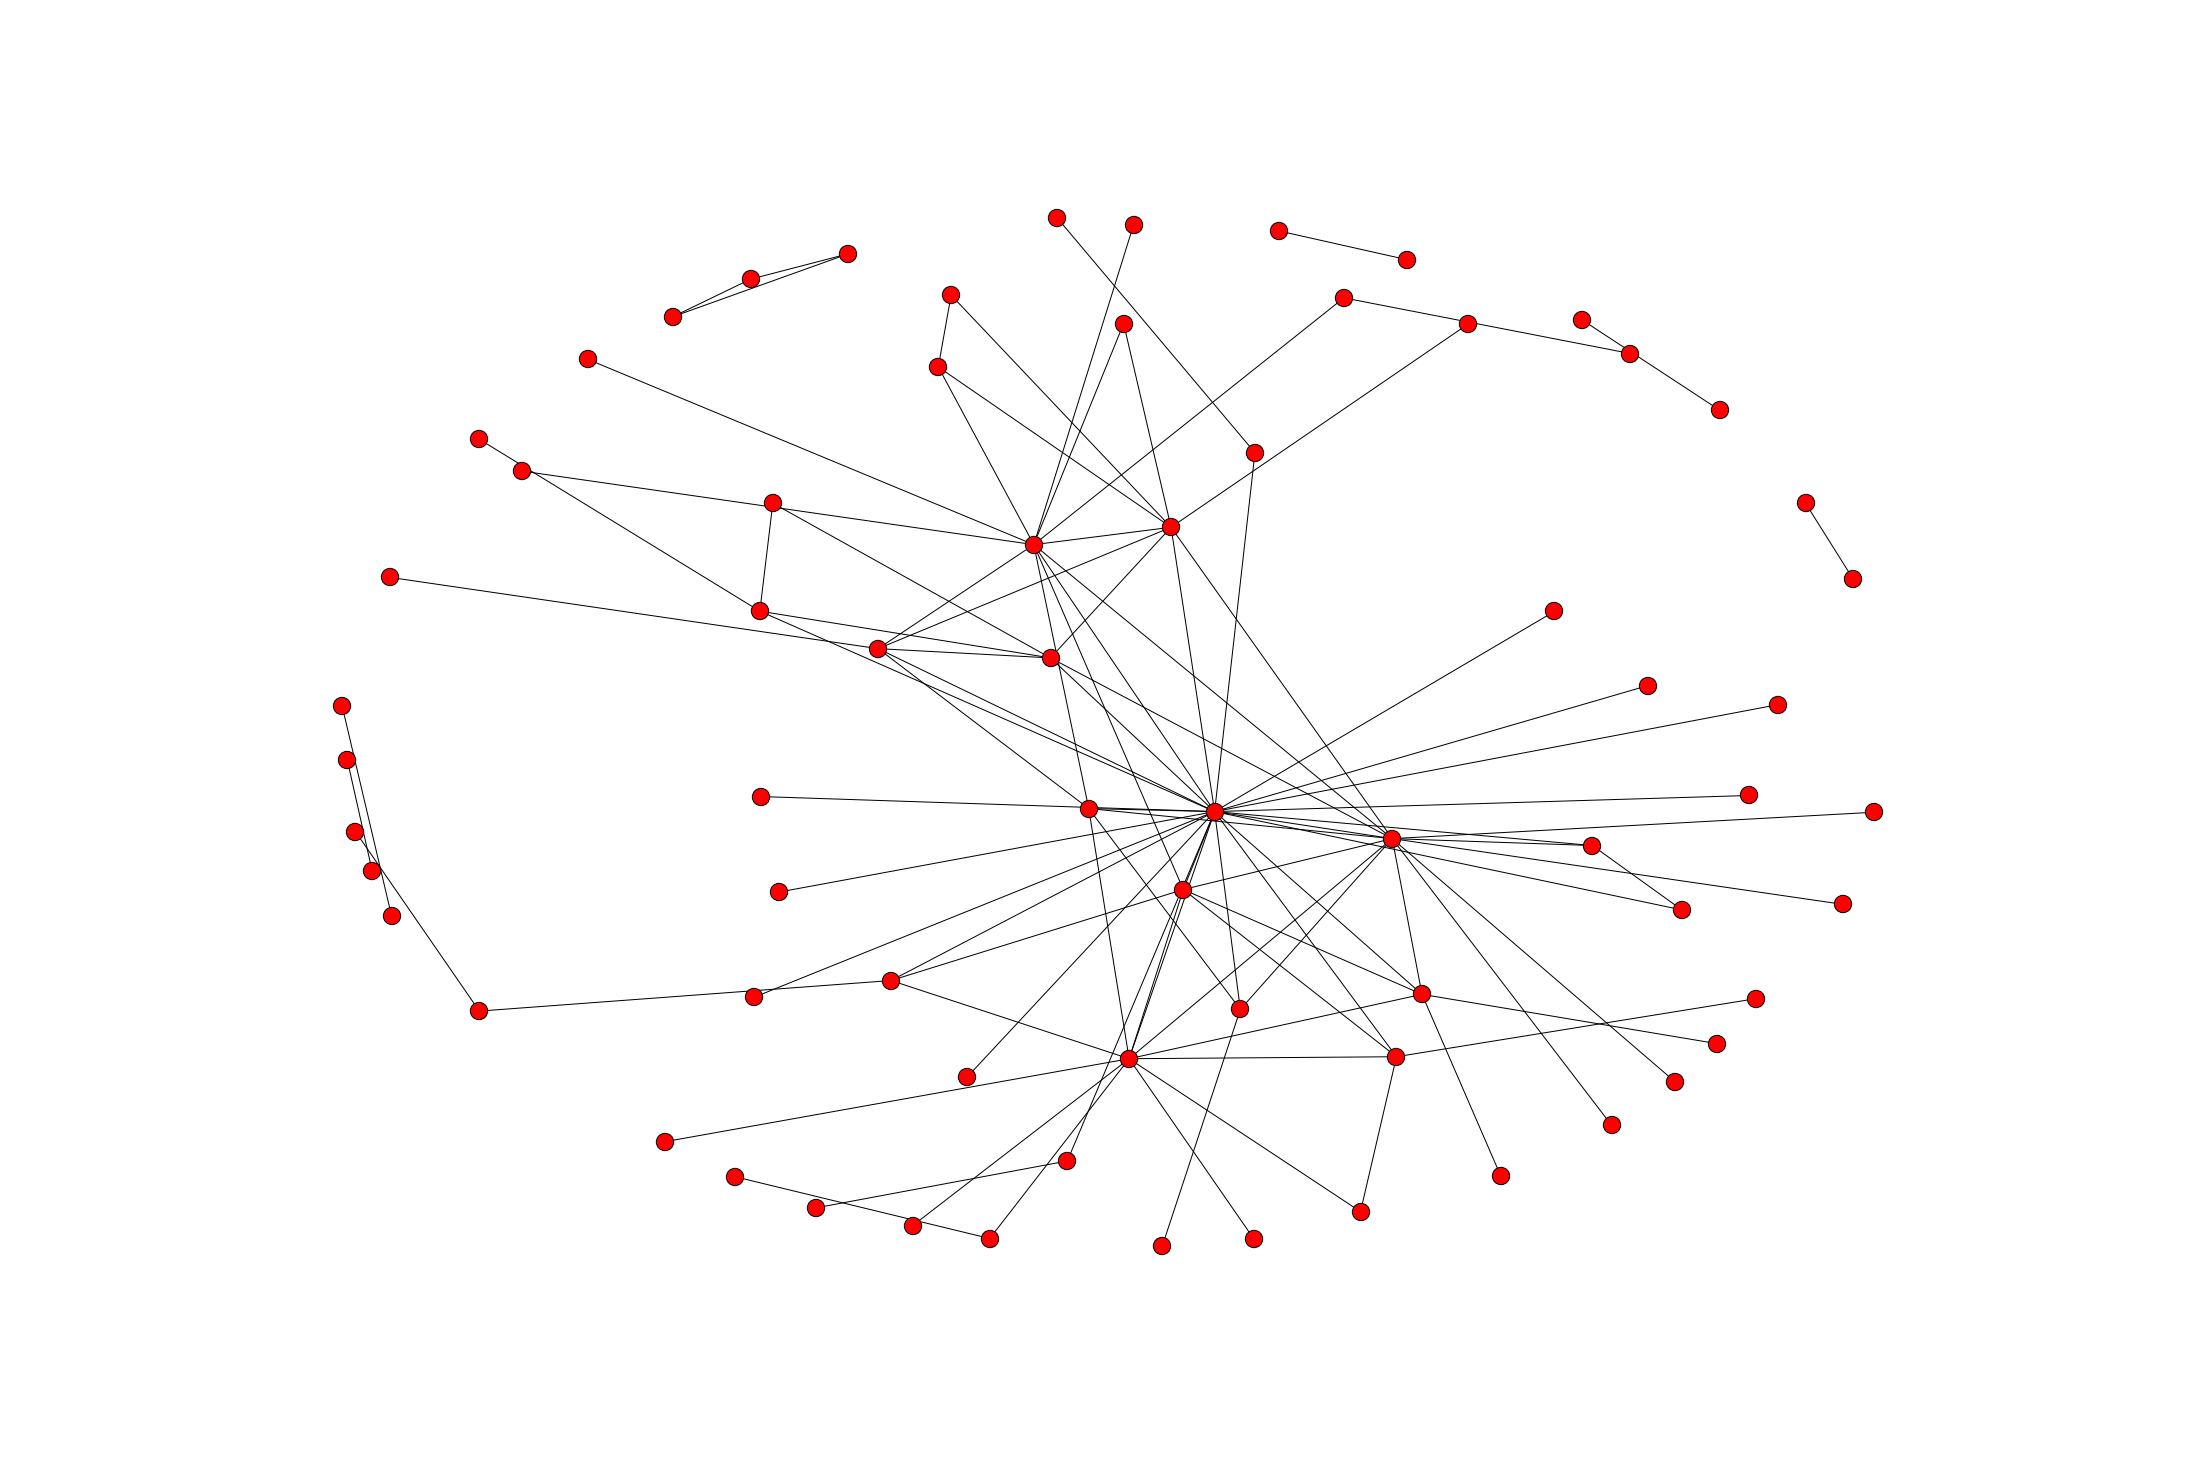

In [12]:
nx.draw(mean_girls_no_isolates)

But we'll use the full network for the time being.

So, we know that we have a few characters that we're interested in learning more about. Cady, the Plastics, Janis and Damian in particular. Let's take a look at some of the measures of centrality for them.

In [13]:
characters_of_interest = ['Cady Heron', 'Regina George', 
                          'Gretchen Weiners', 'Karen Smith', 
                          'Damian', 'Janis Ian']

character_nodes = {}

for node in mean_girls.nodes_iter(data=True):
    if node[1]['name'] in characters_of_interest:
        print node
        character_nodes[node[1]['name']] = node[0]

('21', {'name': 'Damian'})
('2', {'name': 'Cady Heron'})
('7', {'name': 'Janis Ian'})
('31', {'name': 'Regina George'})
('33', {'name': 'Karen Smith'})
('32', {'name': 'Gretchen Weiners'})


In [14]:
degree_centrality = nx.degree_centrality(mean_girls)

for key, value in character_nodes.items():
    print key, ' -- ', mean_girls.degree(value), ' -- ', degree_centrality[value]

Janis Ian  --  6  --  0.0740740740741
Damian  --  12  --  0.148148148148
Gretchen Weiners  --  7  --  0.0864197530864
Cady Heron  --  25  --  0.308641975309
Regina George  --  12  --  0.148148148148
Karen Smith  --  6  --  0.0740740740741


So, Cady is in the lead with 25 direct connections, followed by Regina and Damian. What about closeness centrality?

In [15]:
closeness_centrality = nx.closeness_centrality(mean_girls)

for key, value in character_nodes.items():
    print key, ' -- ', closeness_centrality[value]

Janis Ian  --  0.296394277876
Damian  --  0.321945508727
Gretchen Weiners  --  0.327593675547
Cady Heron  --  0.424382716049
Regina George  --  0.32474503489
Karen Smith  --  0.298765432099


Cady still leads in closeness centrality. What about betweenness centrality?

In [16]:
betweenness_centrality = nx.betweenness_centrality(mean_girls)

for key, value in character_nodes.items():
    print key, ' -- ', betweenness_centrality[value]

Janis Ian  --  0.017896090535
Damian  --  0.0969598765432
Gretchen Weiners  --  0.0167626886145
Cady Heron  --  0.273854595336
Regina George  --  0.0958899176955
Karen Smith  --  0.033024691358


Let's map out the network in a more understandable method. 

We are interested in a few characters -- let's set them aside.

In [17]:
cady = ['Cady Heron']
friends = ['Damian', 'Janis Ian']
plastics = ['Karen Smith', 'Regina George', 'Gretchen Weiners']

cady_dict = {name : character_nodes[name] for name in cady if name in character_nodes}
friends_dict = {name : character_nodes[name] for name in friends if name in character_nodes}
plastics_dict = {name : character_nodes[name] for name in plastics if name in character_nodes}

# We also want to set up a few other groups of interest, but we need to access them out of mean_girls.nodes_iter()

love_interests = ['Aaron Samuels', 'Kevin Gnapoor', 'Shane Oman']
teachers = ['Ms. Norbury', 'Mr. Duvall', 'Chemistry Teacher', 
            'English Teacher', 'History Teacher', 'Music Teacher',
            'German Teacher', 'Coach Carr']
family = ['Cady\'s Dad', 'Cady\'s Mom', 'Taylor Wedell\'s Mom', 
          'Mrs. George', 'Mr. George', 'Kylie George']

love_interests_dict = {}
teachers_dict = {}
family_dict = {}
all_other_nodes = {}

for node in mean_girls.nodes_iter(data=True):
    if node[1]['name'] in love_interests:
        love_interests_dict[node[1]['name']] = node[0]
    elif node[1]['name'] in teachers:
        teachers_dict[node[1]['name']] = node[0]
    elif node[1]['name'] in family:
        family_dict[node[1]['name']] = node[0]
    elif node[1]['name'] in cady:
        pass
    elif node[1]['name'] in friends:
        pass
    elif node[1]['name'] in plastics:
        pass
    else:
        all_other_nodes[node[1]['name']] = node[0]

So we can set up a few different attributes for nodes. Some of them are:

- Node Size
- Node Color
- Node Shape
- Alpha

We'll set a couple here ahead of times

In [18]:
character_dicts = {
    'cady' : {
        'dict' : cady_dict,
        'size' : 7500,
        'color' : 'blue',
        'label' : True
    },
    'friends' : {
        'dict' : friends_dict,
        'size' : 5000,
        'color' : 'green',
        'label' : True
    },
    'plastics' : {
        'dict' : plastics_dict,
        'size' : 5000,
        'color' : 'hotpink',
        'label' : True
    },
    'love_interests' : {
        'dict' : love_interests_dict,
        'size' : 4000,
        'color' : 'red',
        'label' : True
    },
    'teachers_dict' : {
        'dict' : teachers_dict,
        'size' : 4000,
        'color' : 'aqua',
        'label' : True
    },
    'family_dict' : {
        'dict' : family_dict,
        'size' : 3500,
        'color' : 'purple',
        'label' : True
    },
    'all_others' : {
        'dict' : all_other_nodes,
        'size' : 500,
        'color' : 'lightgray',
        'label' : False
    }
}

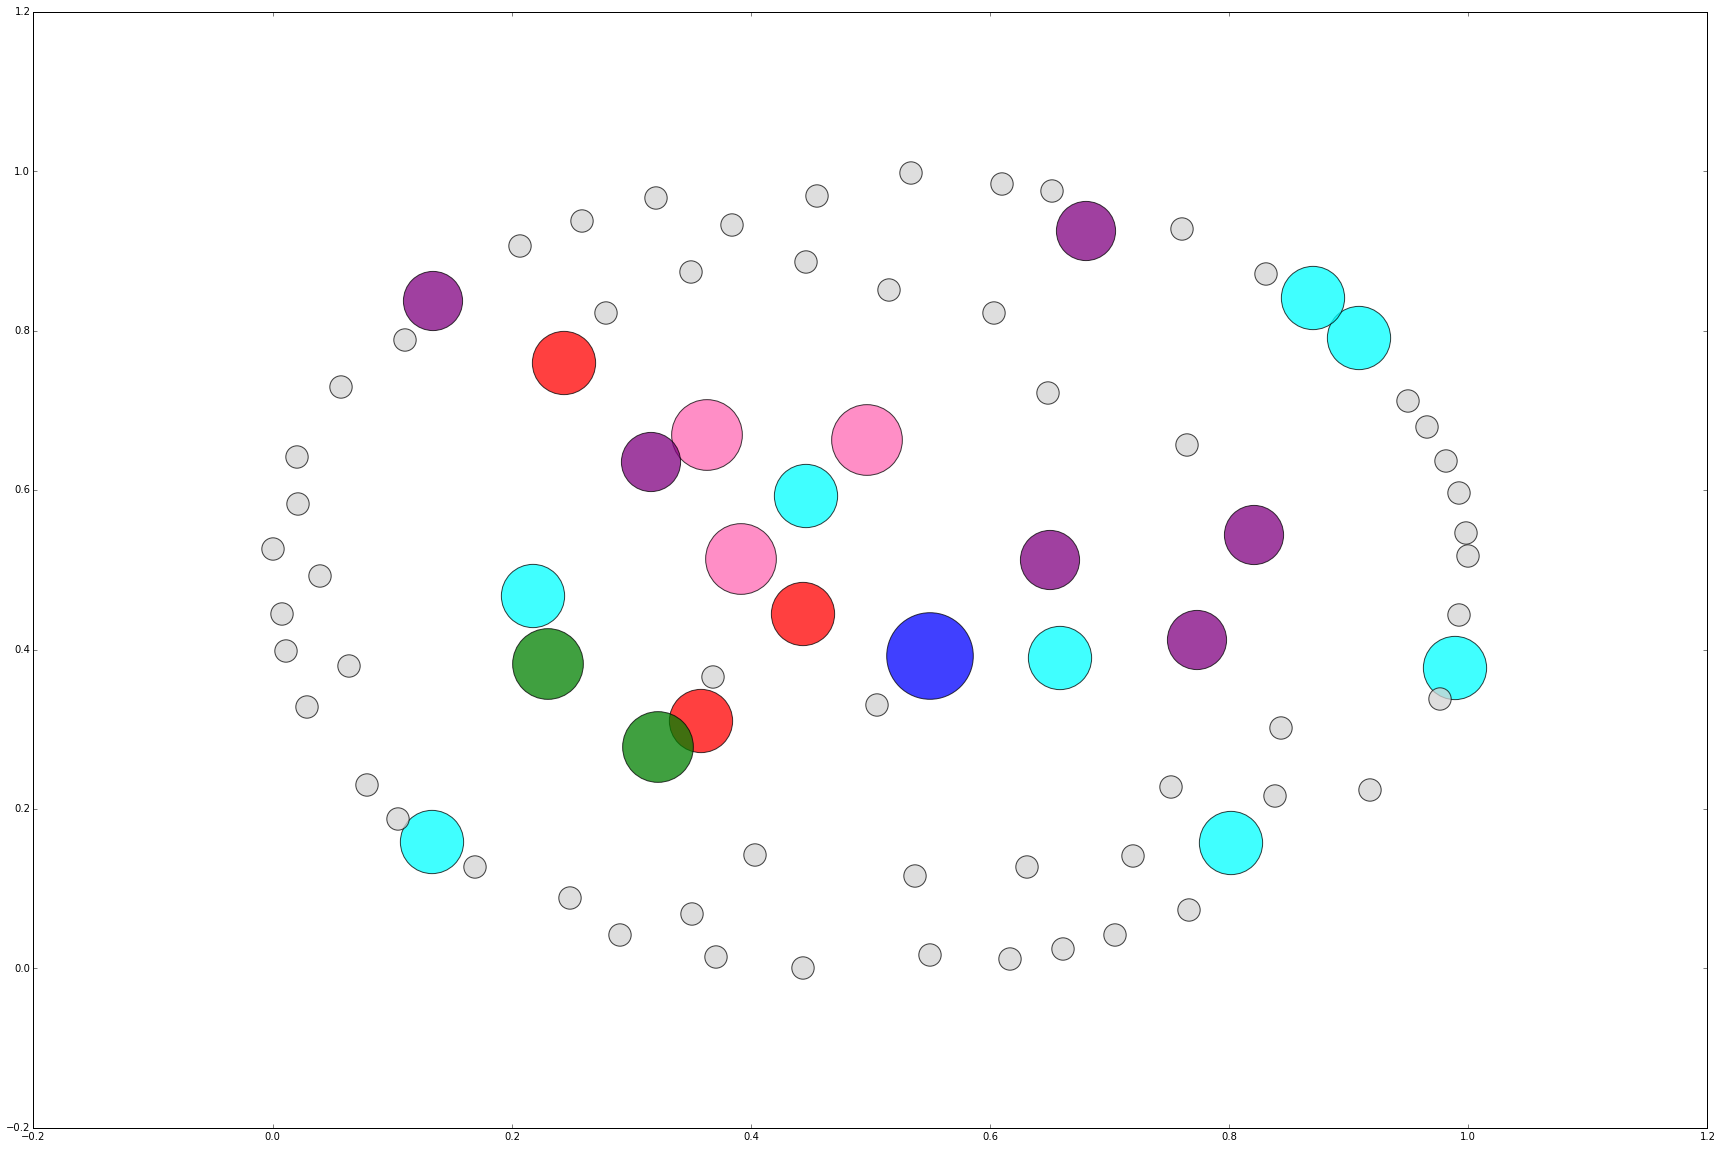

In [19]:
pos = nx.spring_layout(mean_girls)
for key, attribute in character_dicts.items():
    nx.draw_networkx_nodes(mean_girls, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )

Great! Let's splash in some names as well, so we know who is who

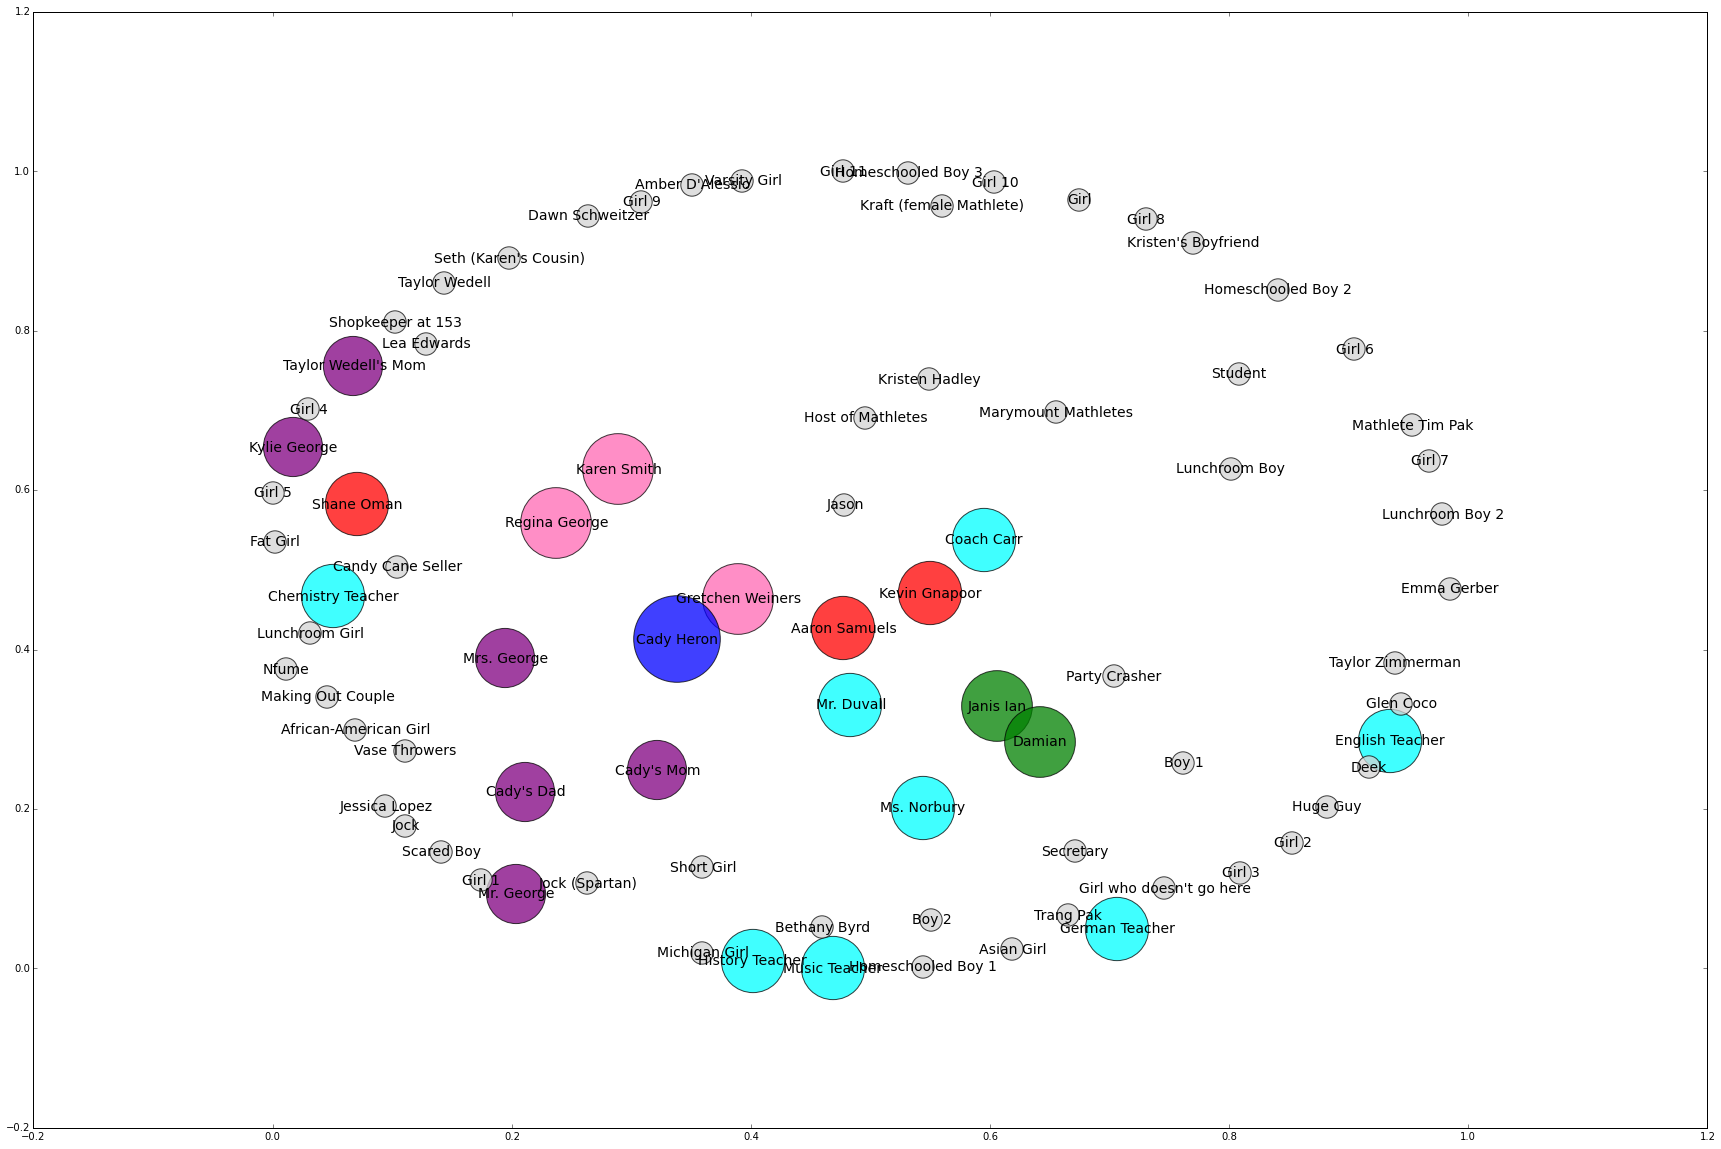

In [20]:
pos = nx.spring_layout(mean_girls)
for key, attribute in character_dicts.items():
    nx.draw_networkx_nodes(mean_girls, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    nx.draw_networkx_labels(mean_girls, pos, 
                            labels = {node : name for name, node in attribute['dict'].items()},
                            font_size = 14,
                            alpha = 0.5
                           )

We probably don't need to know all of the minor characters, so let's cut them out for the time being

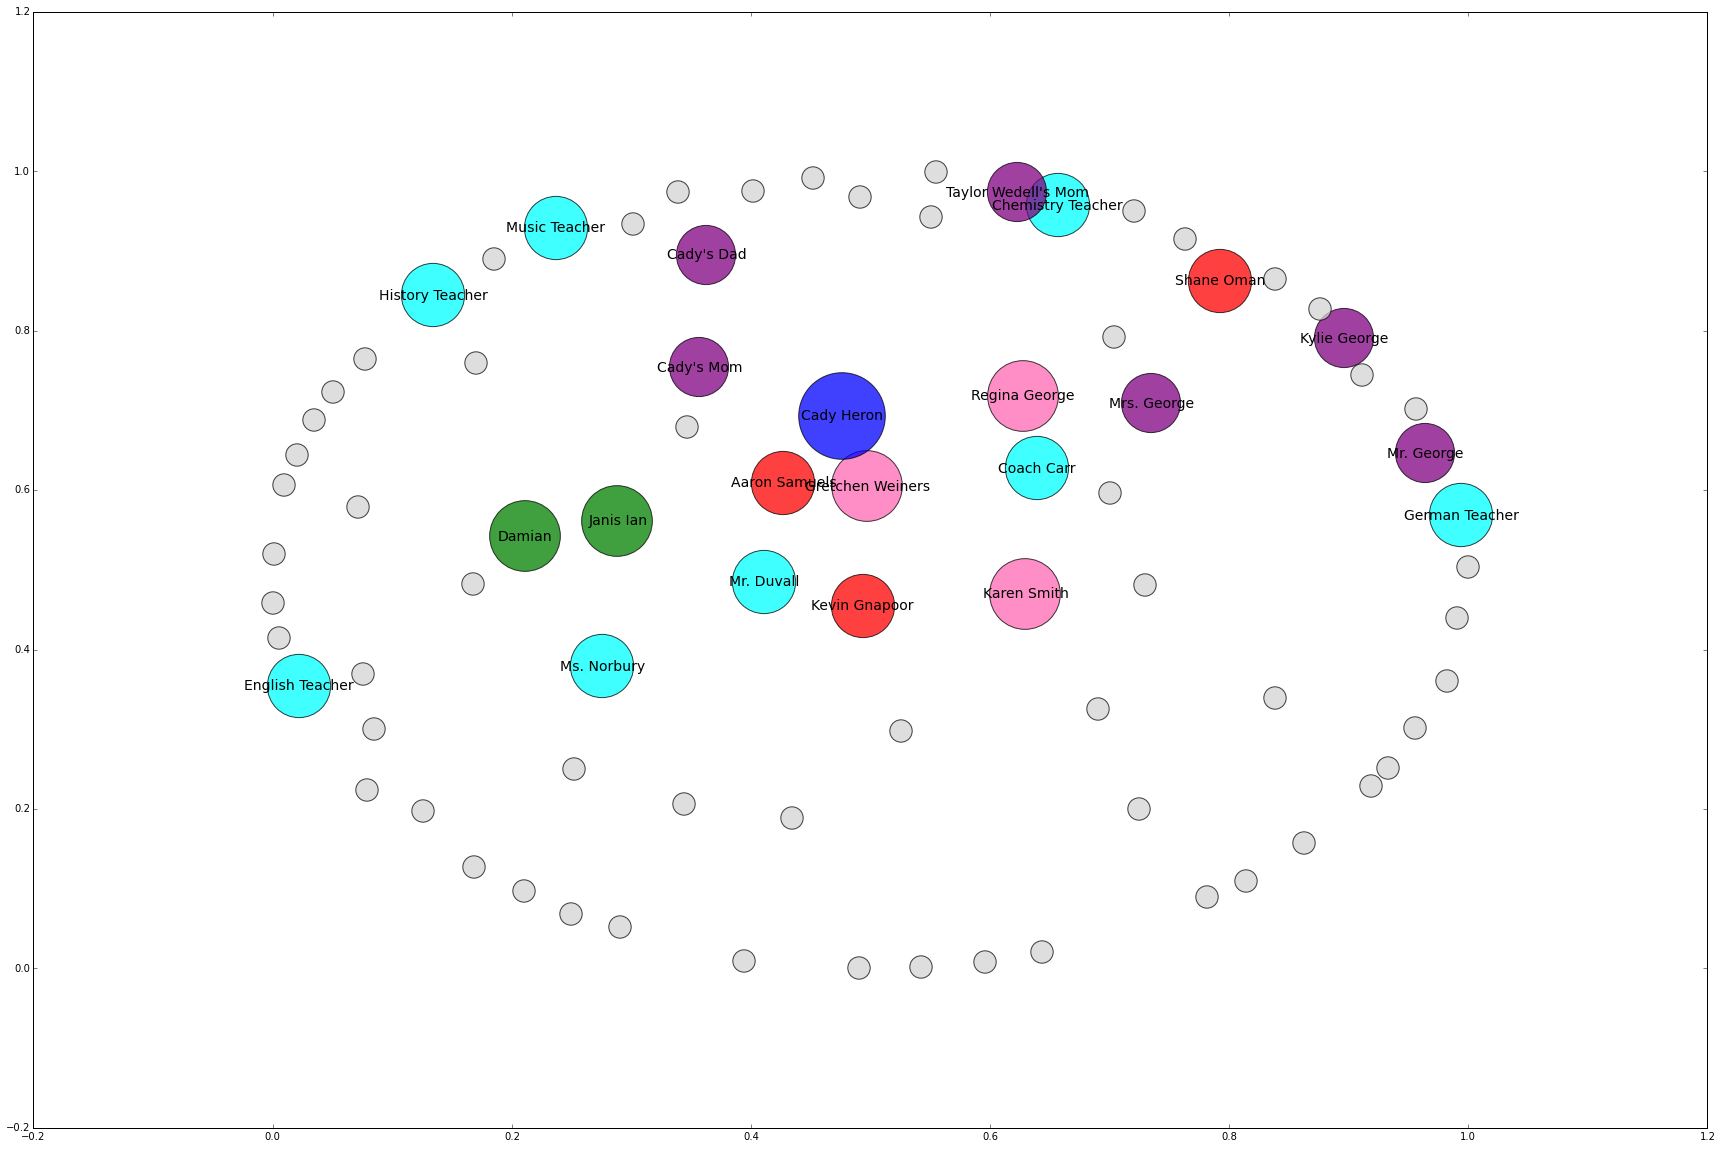

In [21]:
pos = nx.spring_layout(mean_girls)
for key, attribute in character_dicts.items():
    nx.draw_networkx_nodes(mean_girls, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    if attribute['label'] is True:
        nx.draw_networkx_labels(mean_girls, pos, 
                                labels = {node : name for name, node in attribute['dict'].items()},
                                font_size = 14,
                                alpha = 0.5
                               )

Those labels are a little too long. Let's go through and split them up

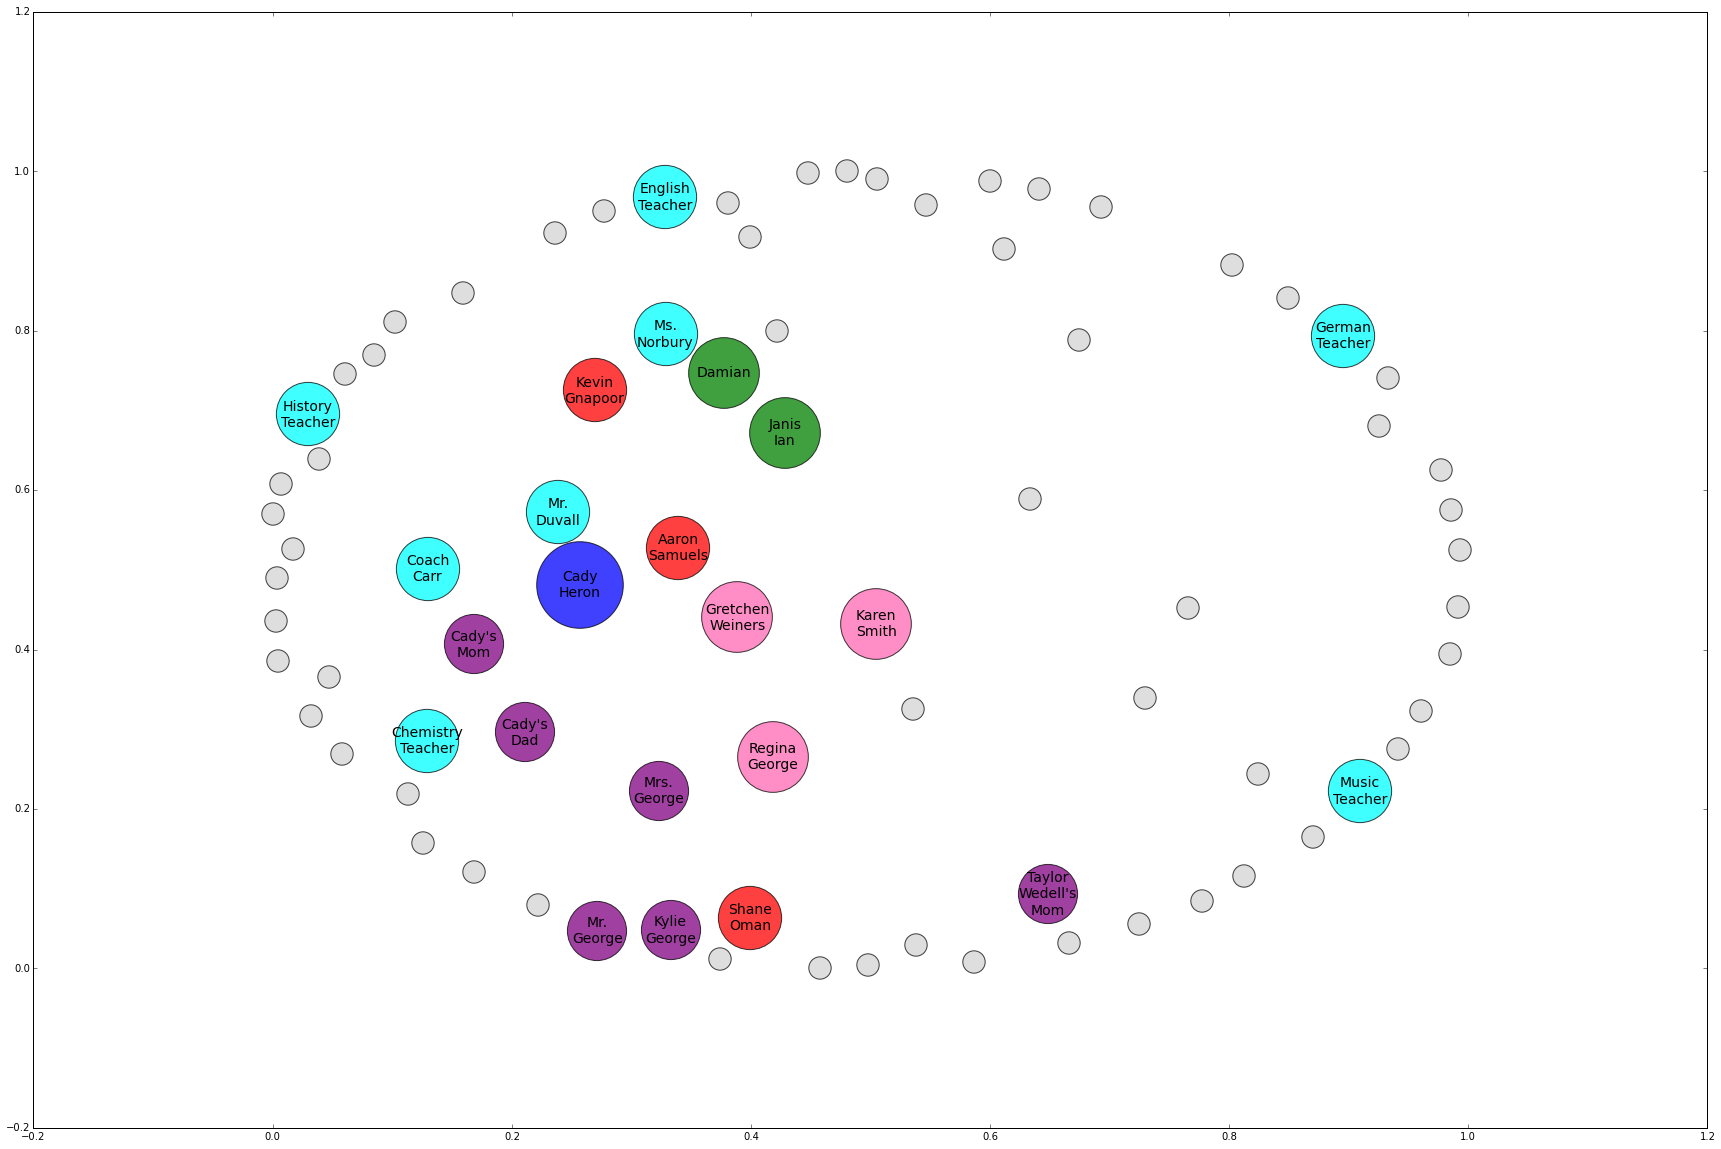

In [22]:
pos = nx.spring_layout(mean_girls)
for key, attribute in character_dicts.items():
    nx.draw_networkx_nodes(mean_girls, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    if attribute['label'] is True:
        nx.draw_networkx_labels(mean_girls, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14,
                                alpha = 0.5
                               )

Great, let's add in the edges!

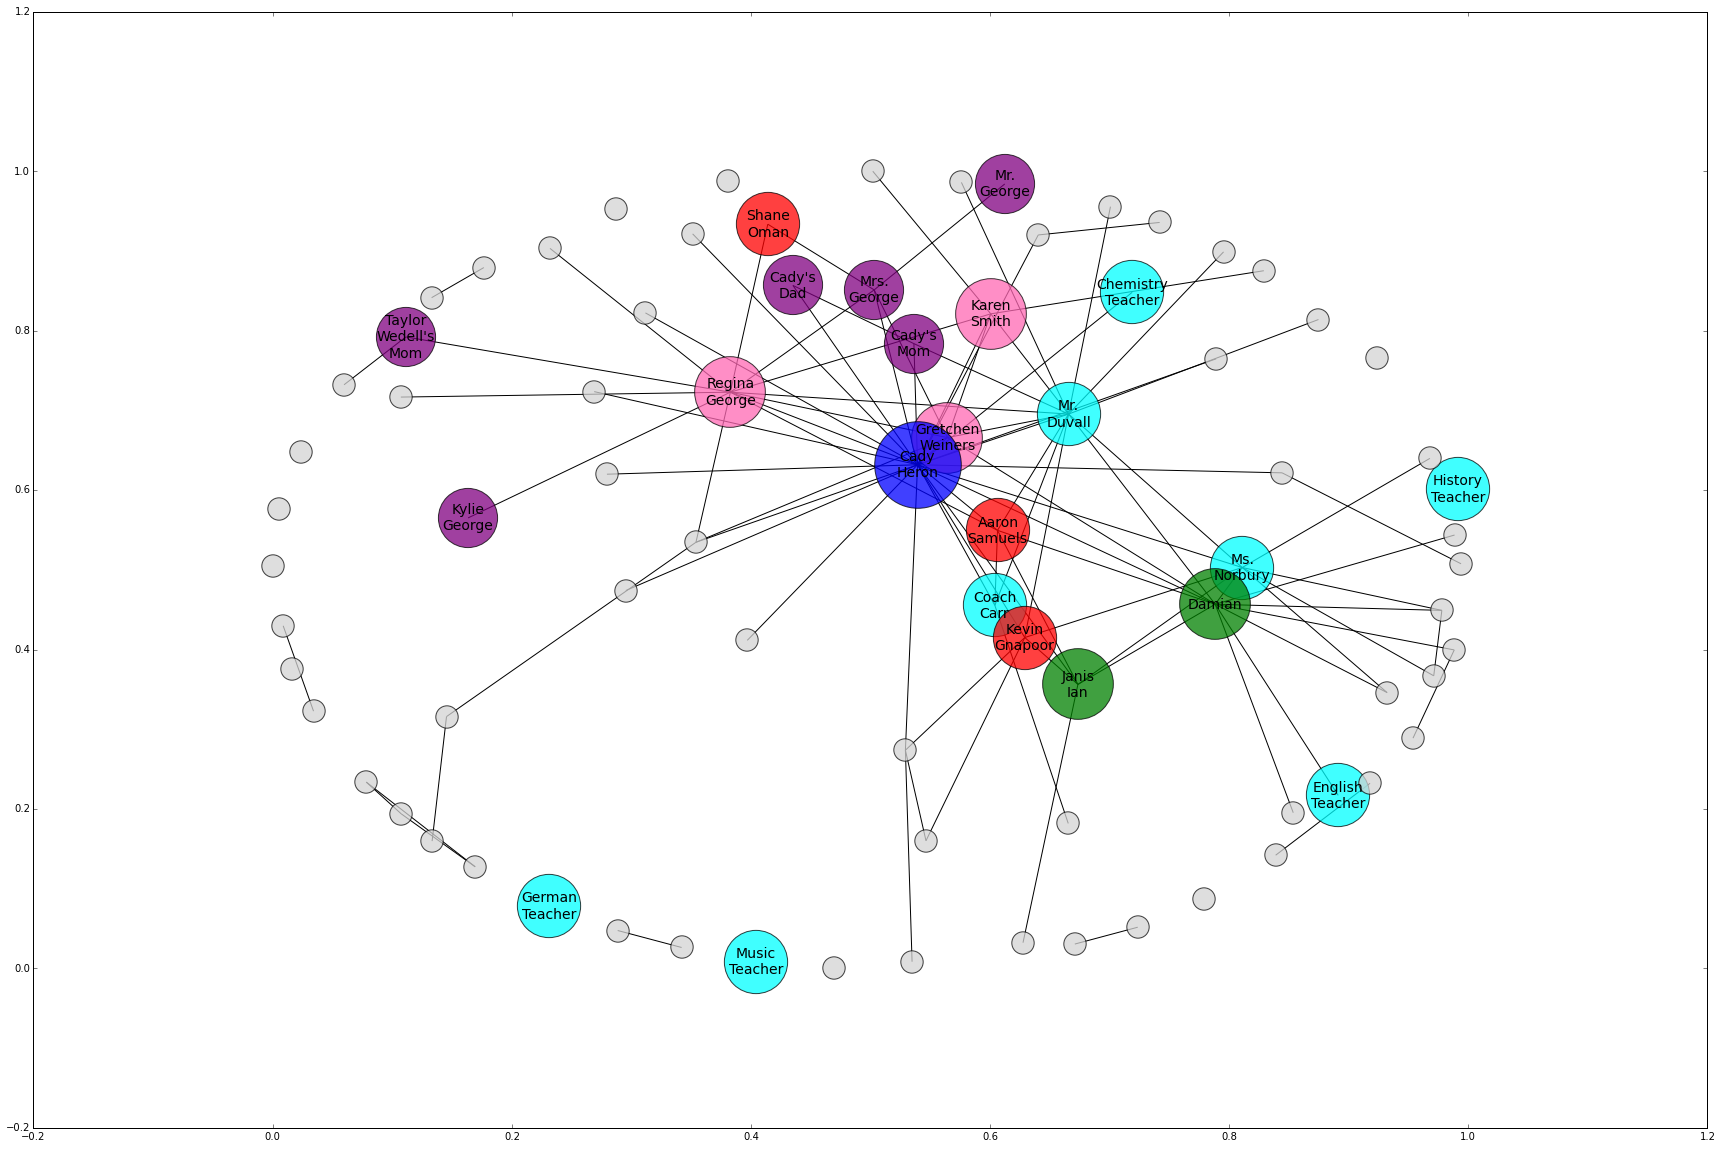

In [23]:
pos = nx.spring_layout(mean_girls)
for key, attribute in character_dicts.items():
    nx.draw_networkx_nodes(mean_girls, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    if attribute['label'] is True:
        nx.draw_networkx_labels(mean_girls, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14,
                                alpha = 0.5
                               )
nx.draw_networkx_edges(mean_girls, pos)

That's atrocious! Let's change some of the colors

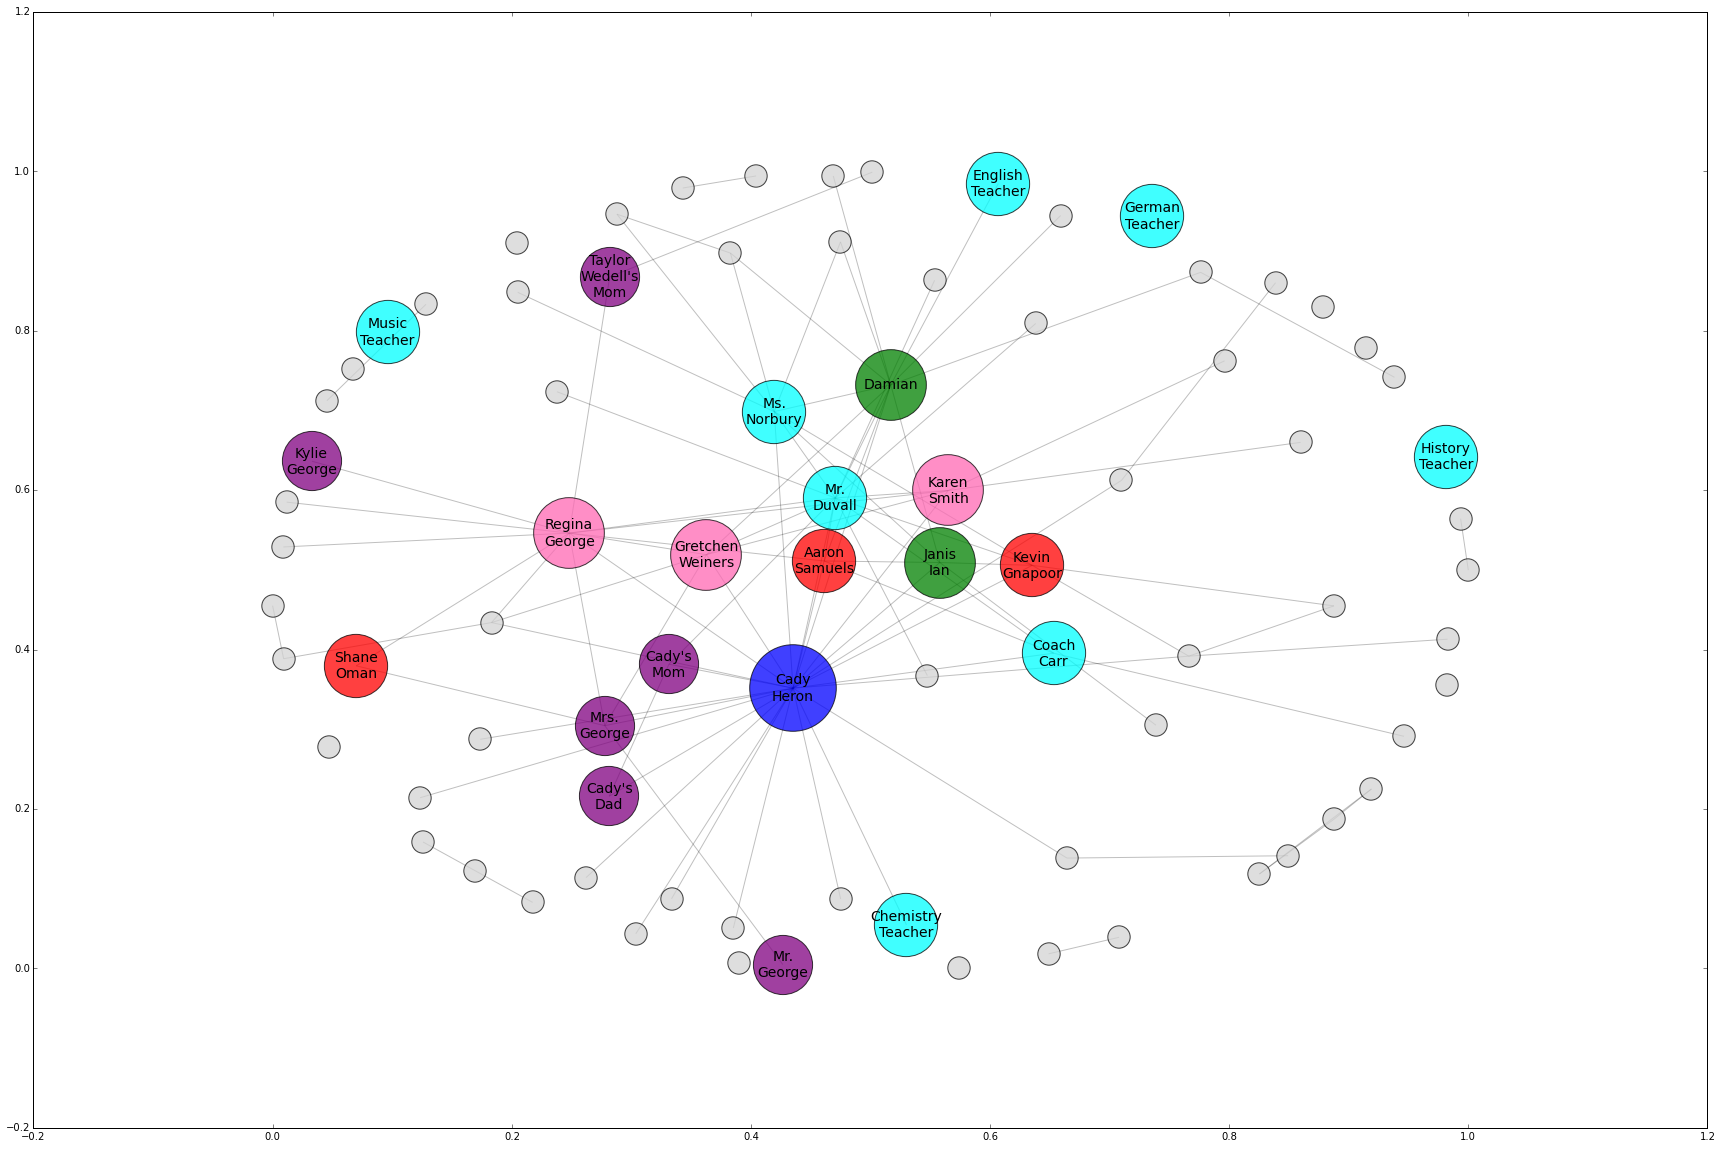

In [24]:
pos = nx.spring_layout(mean_girls)
for key, attribute in character_dicts.items():
    nx.draw_networkx_nodes(mean_girls, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    if attribute['label'] is True:
        nx.draw_networkx_labels(mean_girls, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14,
                                alpha = 0.5
                               )
nx.draw_networkx_edges(mean_girls, pos, alpha = 0.25, line_color = 'lightgray')

This is good, but we should weight the edges by how often they occur. This is pretty easy to do.

In [25]:
from collections import Counter
edge_counter = Counter(edge_list)
edge_counter

Counter({('7', '2'): 62, ('34', '2'): 50, ('31', '2'): 48, ('2', '34'): 47, ('2', '7'): 45, ('32', '2'): 40, ('2', '31'): 40, ('21', '2'): 33, ('9', '2'): 29, ('33', '32'): 23, ('33', '2'): 22, ('32', '33'): 21, ('21', '7'): 19, ('2', '32'): 18, ('32', '31'): 17, ('31', '32'): 17, ('7', '21'): 16, ('2', '9'): 16, ('31', '33'): 15, ('2', '21'): 15, ('34', '31'): 12, ('31', '34'): 12, ('2', '33'): 12, ('36', '2'): 11, ('0', '2'): 11, ('10', '9'): 10, ('2', '1'): 10, ('1', '2'): 10, ('33', '31'): 10, ('2', '0'): 10, ('2', '36'): 9, ('10', '2'): 9, ('9', '10'): 8, ('2', '10'): 6, ('52', '31'): 5, ('31', '52'): 5, ('36', '7'): 4, ('21', '9'): 4, ('40', '2'): 4, ('31', '10'): 4, ('0', '1'): 4, ('9', '21'): 4, ('18', '2'): 3, ('31', '18'): 3, ('40', '31'): 3, ('32', '10'): 3, ('2', '18'): 3, ('10', '33'): 3, ('12', '2'): 3, ('2', '40'): 3, ('32', '18'): 3, ('10', '31'): 3, ('10', '32'): 2, ('7', '36'): 2, ('1', '0'): 2, ('46', '31'): 2, ('9', '11'): 2, ('31', '37'): 2, ('34', '10'): 2, ('9', 

In [27]:
edgelist_with_weight = []
for key, value in edge_counter.items():
    edgelist_with_weight.append((key[0], key[1], value))
    
edgelist_with_weight

[('32', '40', 1),
 ('54', '33', 1),
 ('34', '31', 12),
 ('55', '31', 1),
 ('7', '2', 62),
 ('61', '71', 1),
 ('10', '32', 2),
 ('13', '21', 1),
 ('45', '2', 1),
 ('28', '29', 1),
 ('11', '9', 1),
 ('76', '10', 1),
 ('36', '79', 1),
 ('73', '9', 1),
 ('18', '2', 3),
 ('63', '80', 1),
 ('31', '18', 3),
 ('10', '9', 10),
 ('40', '31', 3),
 ('77', '10', 1),
 ('7', '36', 2),
 ('35', '2', 1),
 ('7', '34', 1),
 ('21', '73', 1),
 ('19', '17', 1),
 ('9', '72', 1),
 ('1', '0', 2),
 ('31', '34', 12),
 ('2', '1', 10),
 ('21', '28', 1),
 ('46', '31', 2),
 ('75', '74', 1),
 ('21', '13', 1),
 ('36', '7', 4),
 ('66', '67', 1),
 ('32', '10', 3),
 ('10', '36', 1),
 ('32', '33', 21),
 ('7', '22', 1),
 ('2', '20', 1),
 ('21', '50', 1),
 ('21', '9', 4),
 ('18', '32', 1),
 ('33', '32', 23),
 ('34', '2', 50),
 ('1', '2', 10),
 ('9', '11', 2),
 ('21', '34', 1),
 ('81', '78', 1),
 ('29', '28', 1),
 ('2', '18', 3),
 ('64', '65', 1),
 ('31', '37', 2),
 ('10', '21', 1),
 ('10', '33', 3),
 ('30', '10', 1),
 ('32',

In [28]:
mean_girls_weighted = nx.Graph()
mean_girls_weighted.add_nodes_from(node_list)
mean_girls_weighted.add_weighted_edges_from(edgelist_with_weight)

edgewidth=[]
for (u, v, d) in mean_girls_weighted.edges(data=True):
    edgewidth.append(d['weight'])
    
for x in range(0, len(edgewidth)):
    edgewidth[x] = (edgewidth[x]/float(max(edgewidth) / 30))


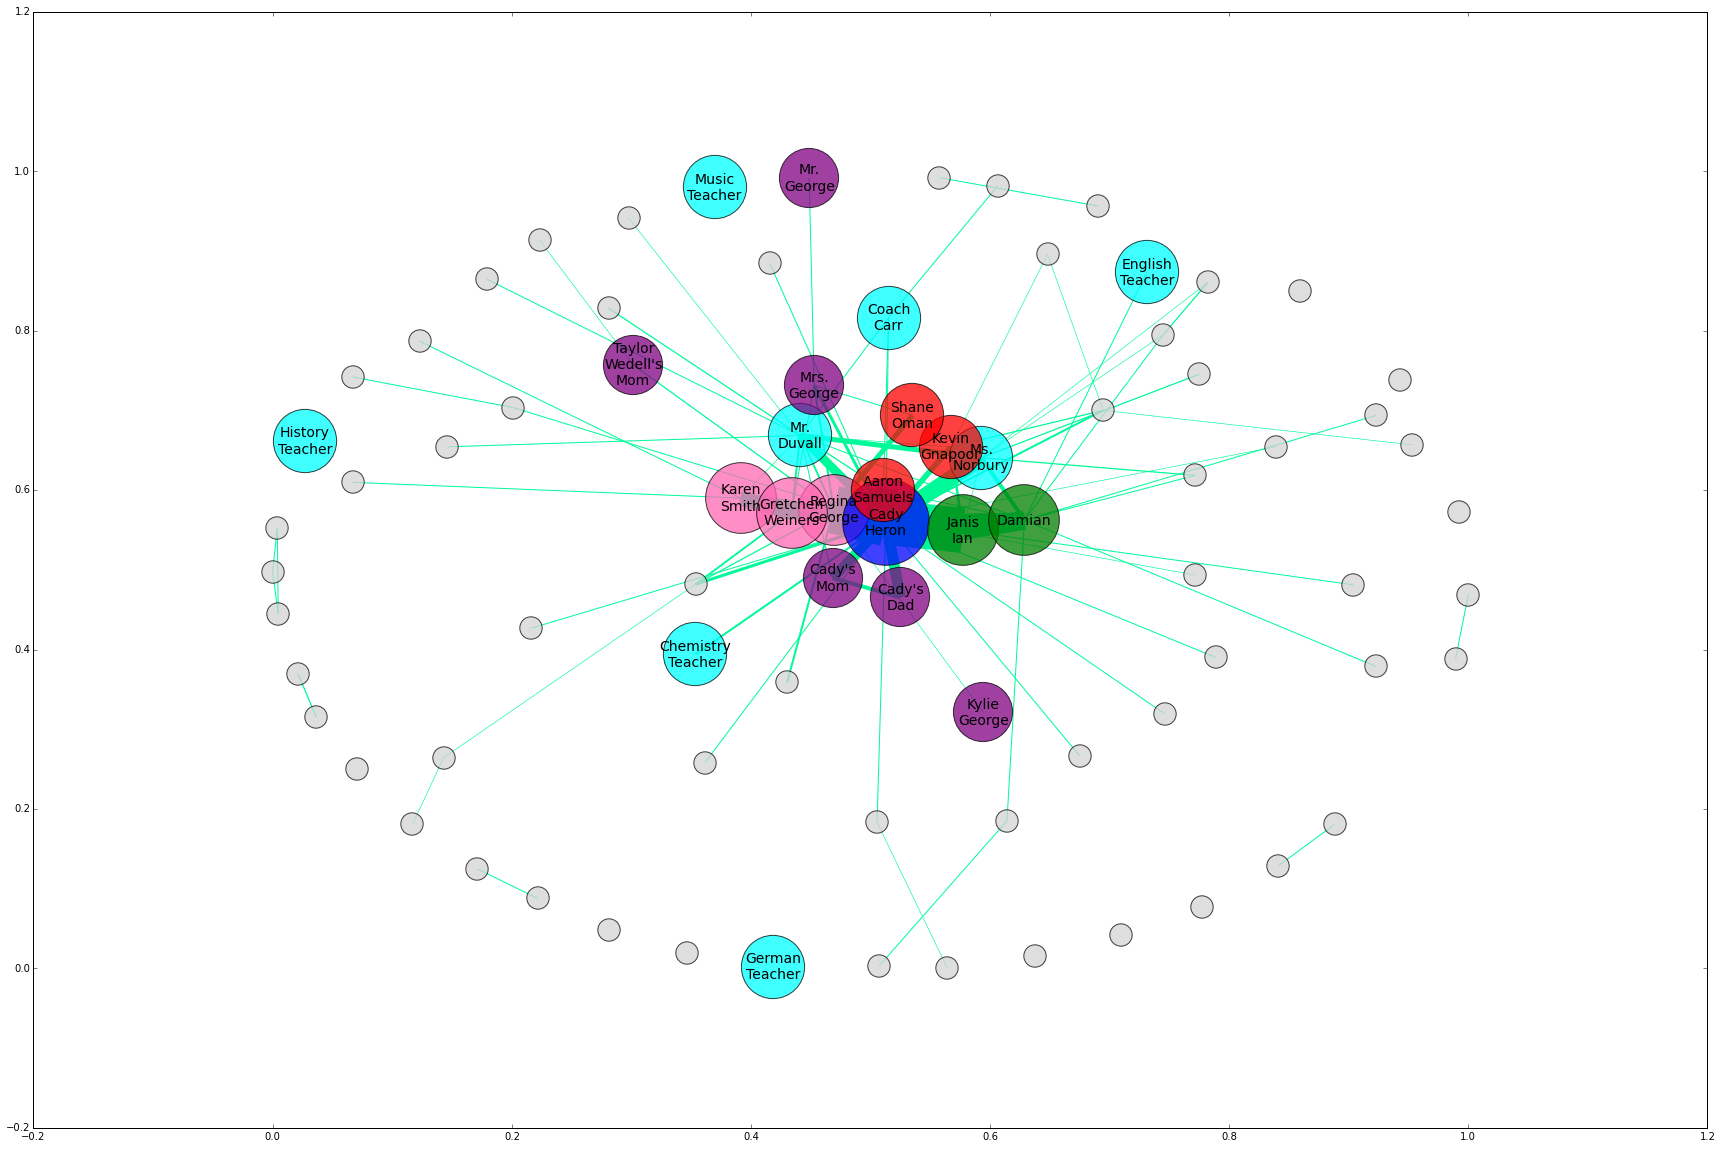

In [30]:
pos = nx.spring_layout(mean_girls_weighted)
for key, attribute in character_dicts.items():
    nx.draw_networkx_nodes(mean_girls_weighted, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    if attribute['label'] is True:
        nx.draw_networkx_labels(mean_girls_weighted, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14,
                                alpha = 0.5
                               )
nx.draw_networkx_edges(mean_girls_weighted, pos, width=edgewidth, edge_color='mediumspringgreen', alpha = 1)

We can also try a different set of layouts --  NetworkX comes with a few options. We'll try each in turn.

#Circular

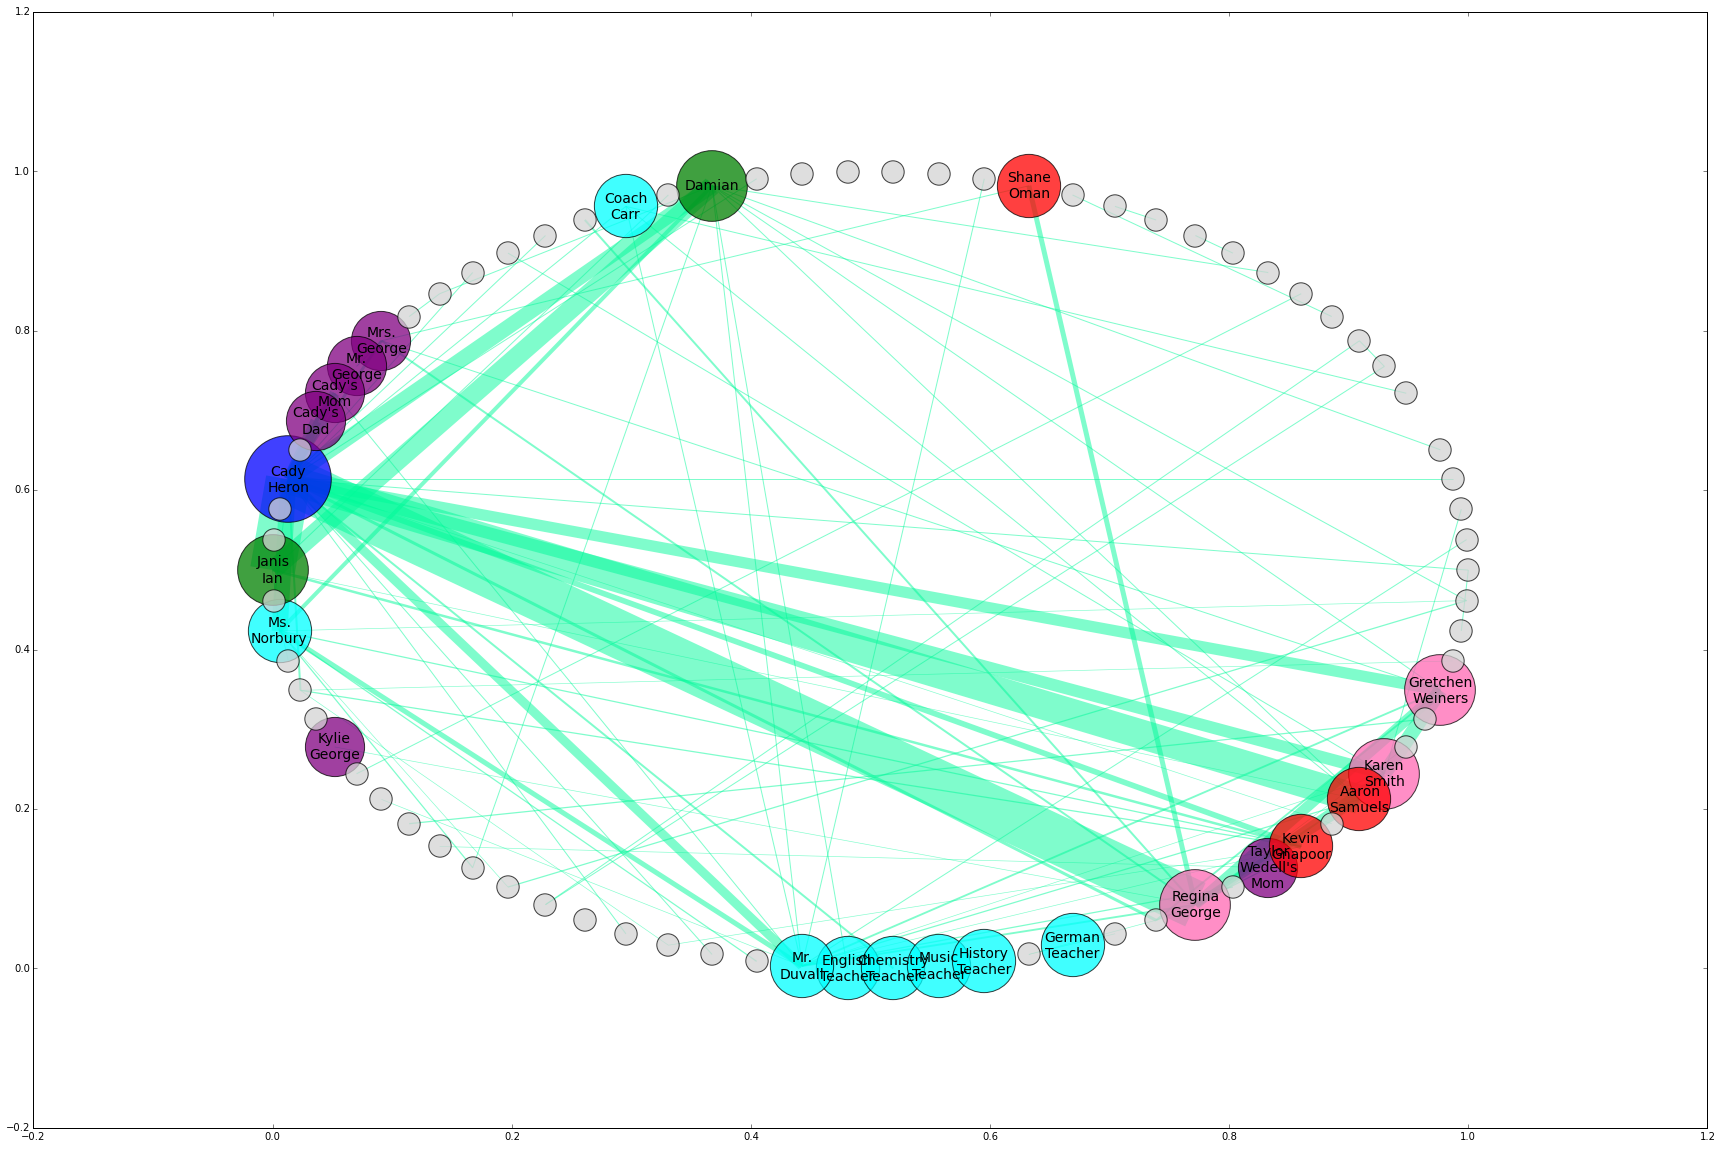

In [31]:
pos = nx.circular_layout(mean_girls_weighted)
for key, attribute in character_dicts.items():
    nx.draw_networkx_nodes(mean_girls_weighted, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    if attribute['label'] is True:
        nx.draw_networkx_labels(mean_girls_weighted, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14,
                                alpha = 0.5
                               )
nx.draw_networkx_edges(mean_girls_weighted, pos, width=edgewidth, edge_color='mediumspringgreen', alpha = 0.5)

#Random Layout

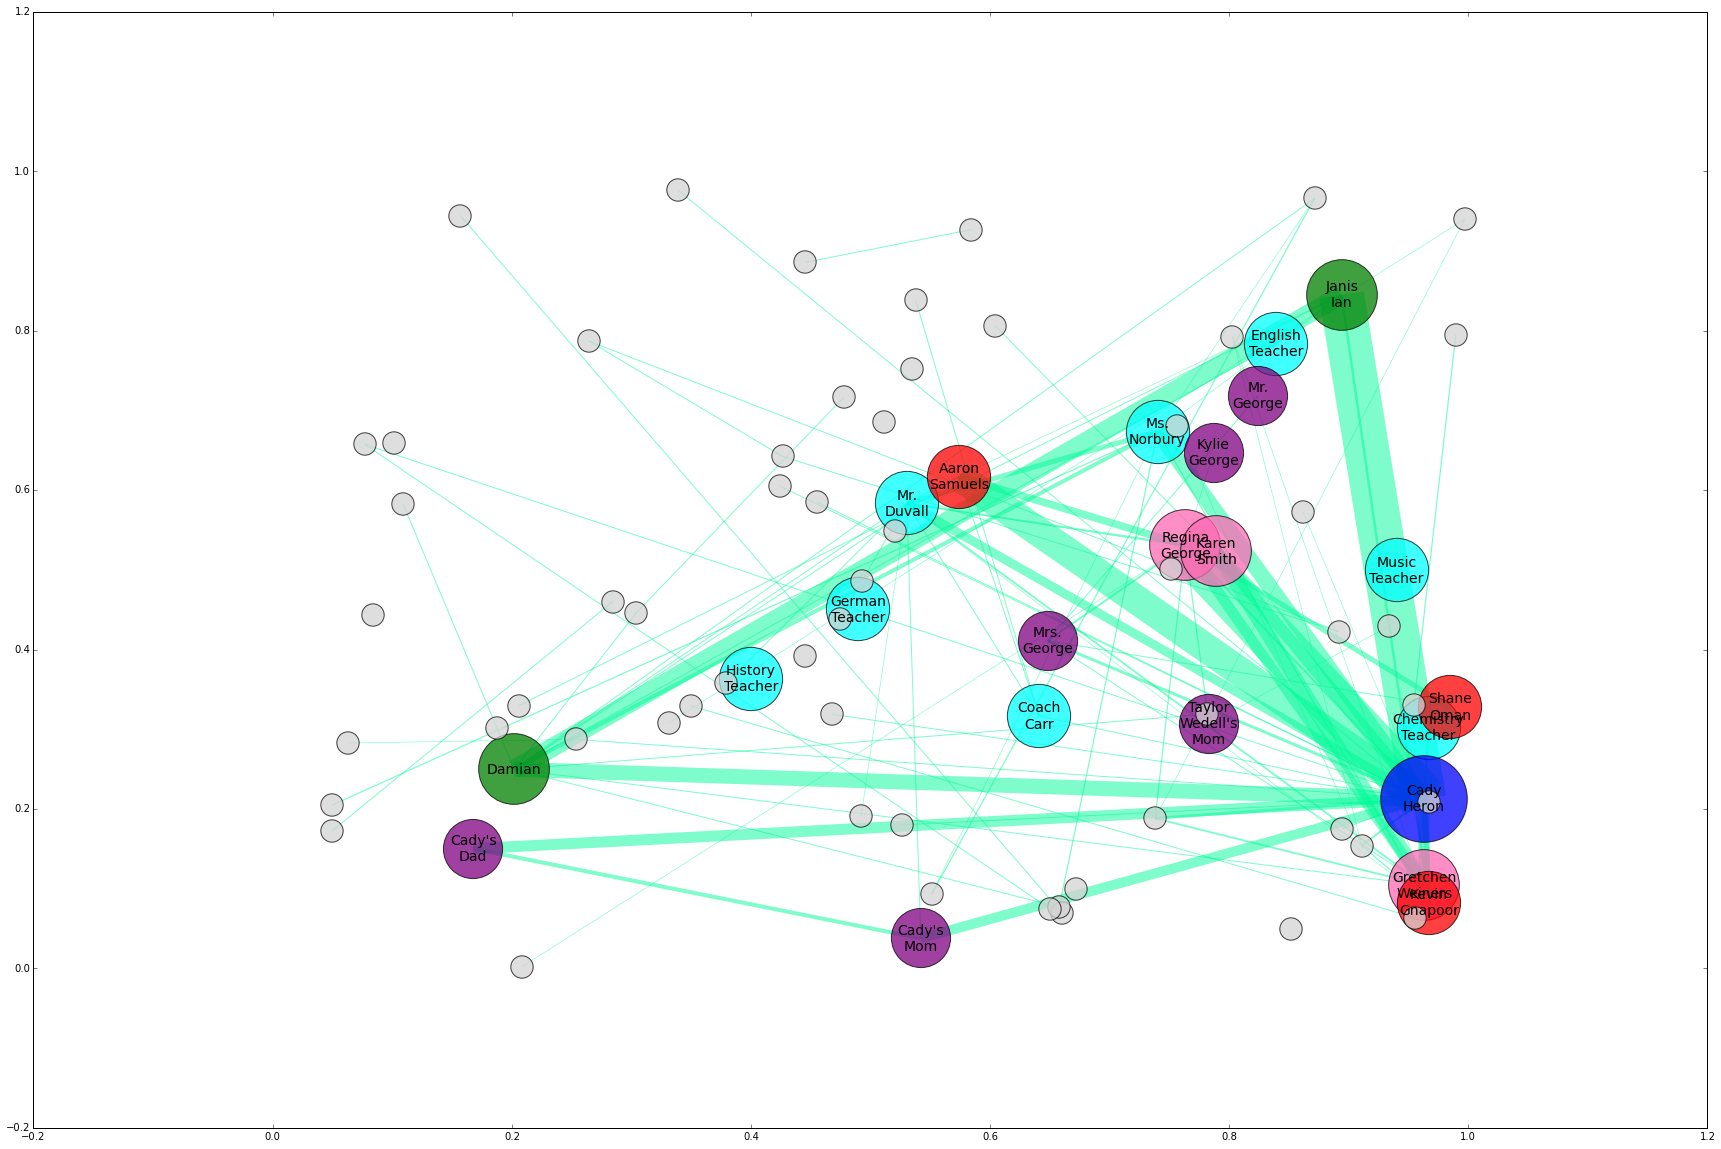

In [32]:
pos = nx.random_layout(mean_girls_weighted)
for key, attribute in character_dicts.items():
    nx.draw_networkx_nodes(mean_girls_weighted, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    if attribute['label'] is True:
        nx.draw_networkx_labels(mean_girls_weighted, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14,
                                alpha = 0.5
                               )
nx.draw_networkx_edges(mean_girls_weighted, pos, width=edgewidth, edge_color='mediumspringgreen', alpha = 0.5)

Finally, let's finish cleaning up the network

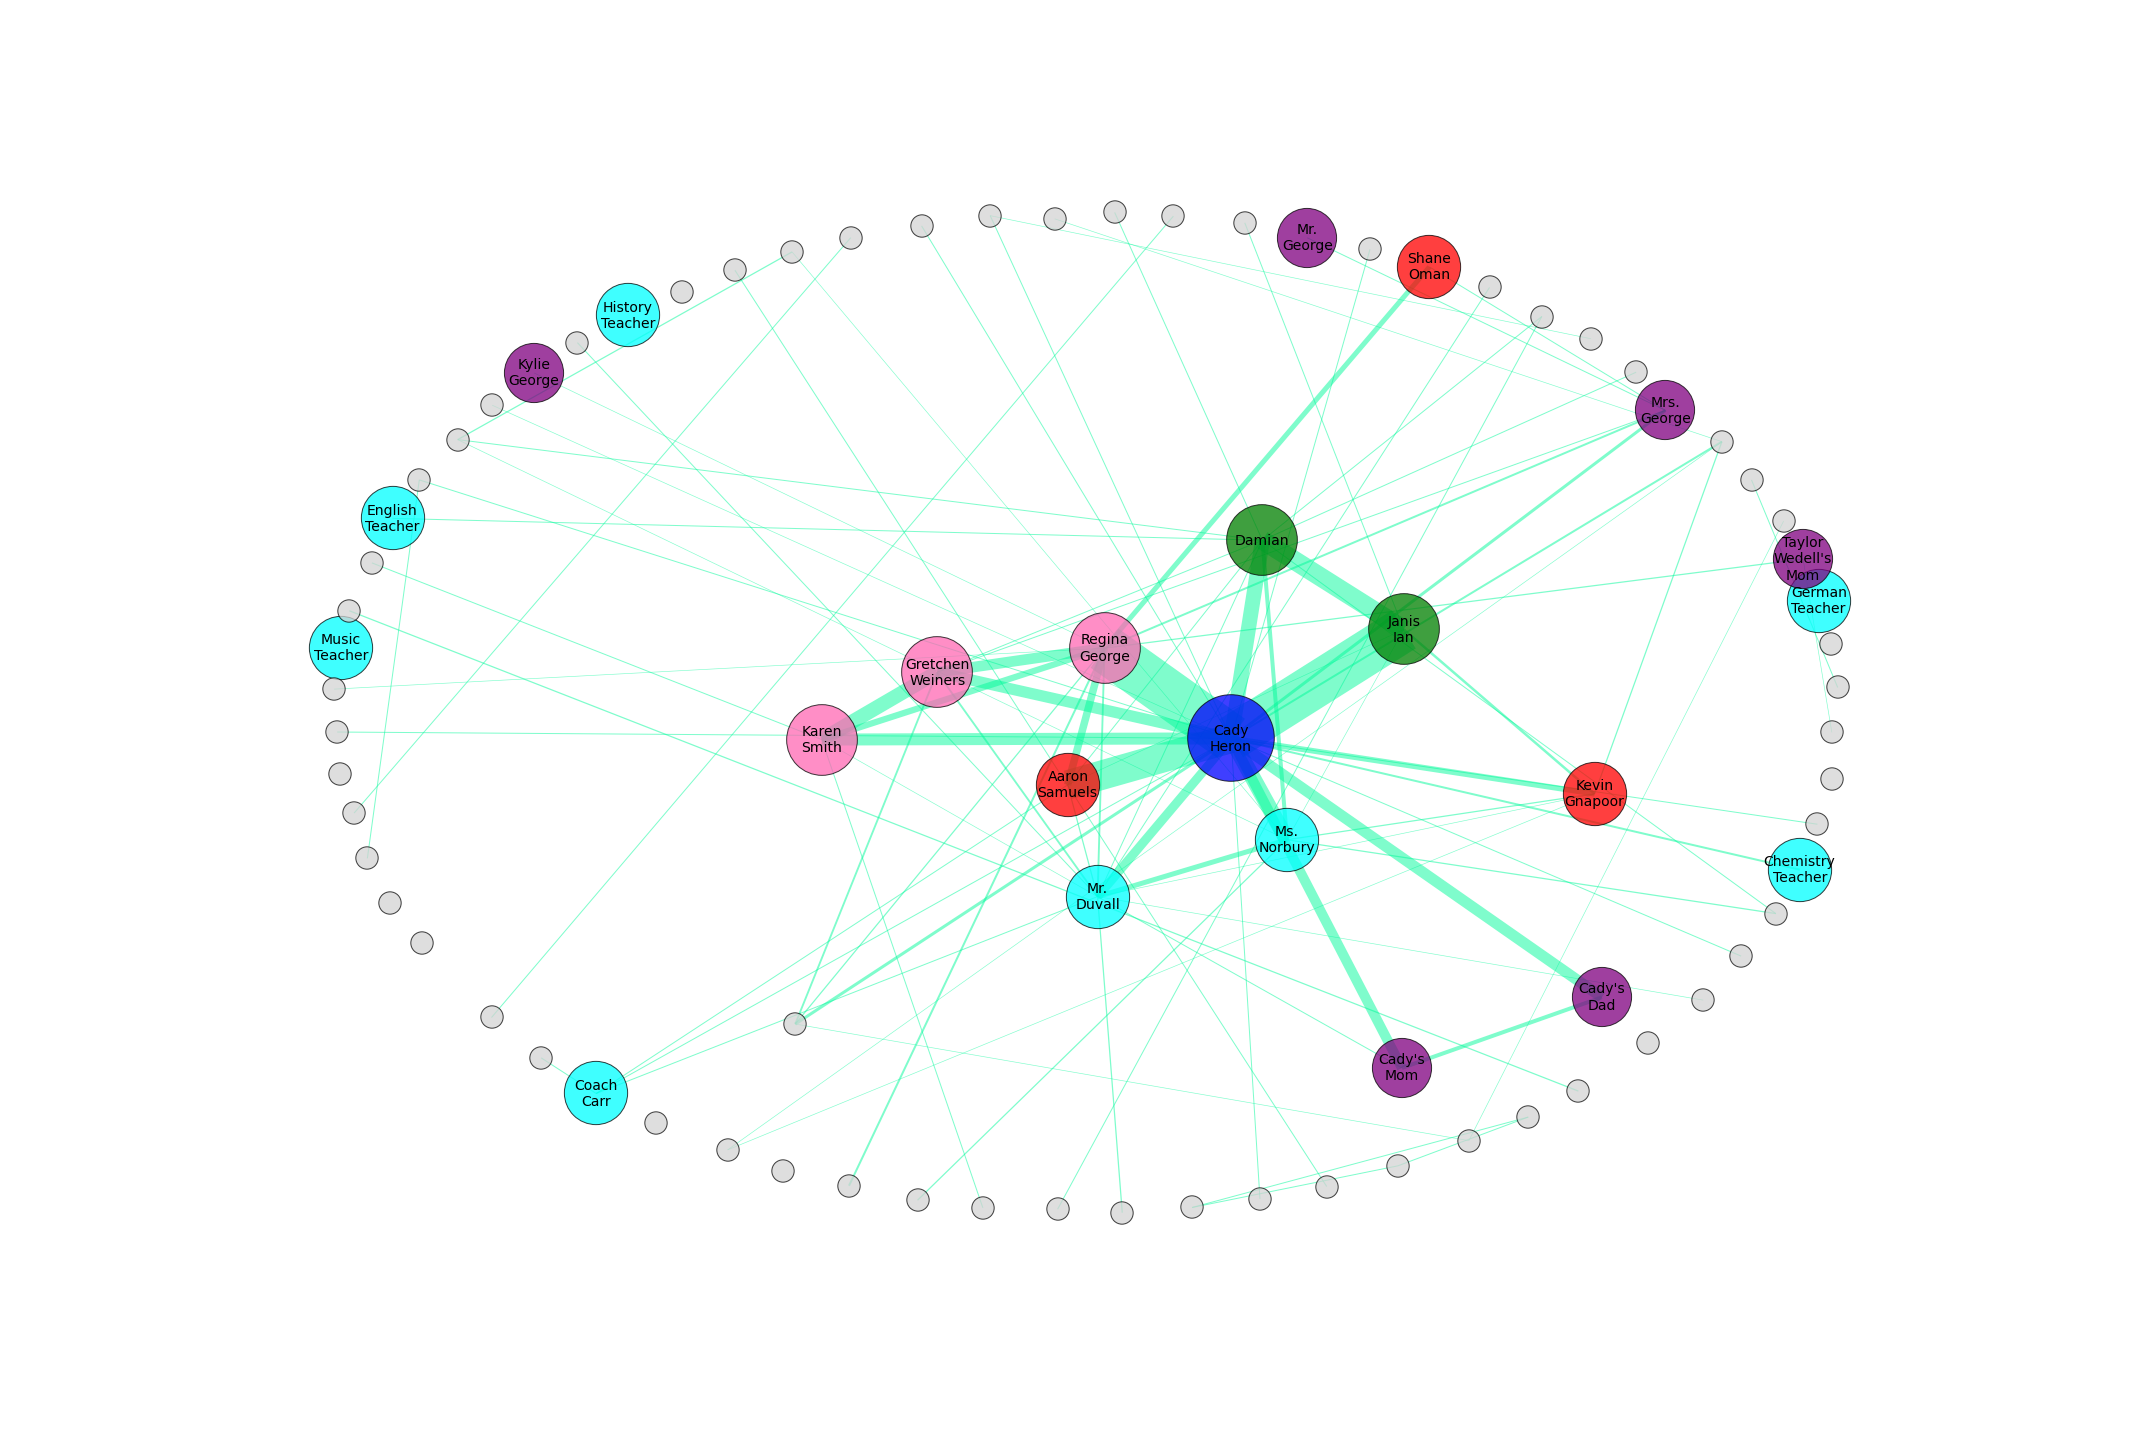

In [33]:
pos = nx.spring_layout(mean_girls_weighted, k=0.35)
for key, attribute in character_dicts.items():
    nx.draw_networkx_nodes(mean_girls_weighted, pos, 
                          nodelist = [node for key, node in attribute['dict'].items()],
                           node_size = attribute['size'],
                           node_color = attribute['color'],
                           alpha = 0.75,
                           linewidth = 0
                          )
    if attribute['label'] is True:
        nx.draw_networkx_labels(mean_girls_weighted, pos, 
                                labels = {node : name.replace(' ', '\n') for name, node in attribute['dict'].items()},
                                font_size = 14,
                                alpha = 0.5
                               )
nx.draw_networkx_edges(mean_girls_weighted, pos, width=edgewidth, edge_color='mediumspringgreen', alpha = 0.5)
plt.axis('off')
plt.tight_layout()

In [34]:
nx.write_graphml(mean_girls_weighted,'mean_girls.graphml')